<a href="https://colab.research.google.com/github/vamsikartik01/Deep-Learning/blob/main/Deep_Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img1 = np.array([200]*64*3)
img1 = img1.reshape(8,8,3)
img1.shape

(8, 8, 3)

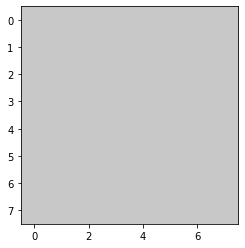

In [ ]:
plt.imshow(img1)

In [6]:
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[0,1,1,0],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1],[0,0,1,1],[1,1,0,0]])
X = X.T
X

array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]])

In [8]:
Y = np.array([[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[0],[0]])
Y = Y.T
Y

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]])

In [9]:
X.shape

(4, 12)

In [10]:
X.shape

(4, 12)

In [11]:
Y.shape

(1, 12)

In [12]:
n_i = X.shape[0]
n_h1 = 4
n_h2 = 3
n_h3 = 2
n_o = Y.shape[0]

In [26]:
w1 = np.random.uniform(size=(n_h1,n_i))
b1 = np.random.uniform(size=(n_h1,1))
w2 = np.random.uniform(size=(n_h2,n_h1))
b2 = np.random.uniform(size=(n_h2,1))
w3 = np.random.uniform(size=(n_h3,n_h2))
b3 = np.random.uniform(size=(n_h3,1))
w4 = np.random.uniform(size=(n_o,n_h3))
b4 = np.random.uniform(size=(n_o,1))

In [14]:
w1.shape,b1.shape

((4, 4), (4, 1))

In [15]:
w2.shape,b2.shape

((3, 4), (3, 1))

In [16]:
w3.shape,b3.shape

((2, 3), (2, 1))

In [17]:
w4.shape,b4.shape

((1, 2), (1, 1))

In [18]:
def sigmoid(z):
  return(1/(1+np.exp(-z)))

In [25]:
epochs = 5000
lr = 0.05

In [27]:
costs = []
for epoch in range(epochs):
  m = X.shape[1]
  ## Forward Propagation
  Yh1 = np.tanh(np.dot(w1,X)+b1)
  Yh2 = np.tanh(np.dot(w2,Yh1)+b2)
  Yh3 = np.tanh(np.dot(w3,Yh2)+b3)
  A = sigmoid(np.dot(w4,Yh3)+b4)

  ## Cost Function
  cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
  costs.append(cost)

  ## Back Propagation
  dZ = A-Y
  dw4 = (1/m)*np.dot(dZ,Yh3.T)
  db4 = (1/m)*np.sum(dZ, axis=1, keepdims=True)
  dYh3 = np.multiply(np.dot(w4.T,dZ),1-np.power(Yh3,2))
  dw3 = (1/m)*np.dot(dYh3,Yh2.T)
  db3 = (1/m)*np.sum(dYh3, axis=1, keepdims=True)
  dYh2 = np.multiply(np.dot(w3.T,dYh3),1-np.power(Yh2,2))
  dw2 = (1/m)*np.dot(dYh2,Yh1.T)
  db2 = (1/m)*np.sum(dYh2, axis=1, keepdims=True)
  dYh1 = np.multiply(np.dot(w2.T,dYh2),1-np.power(Yh1,2))
  dw1 = (1/m)*np.dot(dYh1,X.T)
  db1 = (1/m)*np.sum(dYh1, axis=1, keepdims=True)
  
  ##parameters
  w4 = w4 - lr*dw4
  b4 = b4 - lr*db4
  w1 = w1 - lr*dw1
  b1 = b1 - lr*db1
  w2 = w2 - lr*dw2
  b2 = b2 - lr*db2
  w3 = w3 - lr*dw3
  b3 = b3 - lr*db3
  

In [28]:
def predict(X):
  Yh1 = np.tanh(np.dot(w1,X)+b1)
  Yh2 = np.tanh(np.dot(w2,Yh1)+b2)
  Yh3 = np.tanh(np.dot(w3,Yh2)+b3)
  A = sigmoid(np.dot(w4,Yh3)+b4)
  return A

In [29]:
predict(X)

array([[0.00420573, 0.00429885, 0.00431644, 0.00433827, 0.99490648,
        0.99590851, 0.99502745, 0.99503383, 0.99591017, 0.9959395 ,
        0.00573526, 0.00576241]])

In [23]:
Y

array([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]])

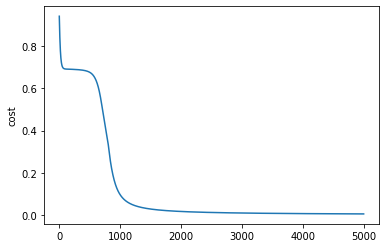

In [30]:
plt.plot(costs)
plt.ylabel("cost")
plt.show()